## Observations and Insights 

In [561]:
# Dependencies and Setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [562]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [563]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [564]:
# Combine the data into a single dataset
# Display the data table for preview
combine_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')
combine_data.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [565]:
# Checking the number of mice.
len(combine_data["Mouse ID"].value_counts())

249

In [566]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combine_data[combine_data.duplicated(["Mouse ID" , "Timepoint"])]
duplicate_mice                         

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [567]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
# Display the data table for preview
clean_data = combine_data.drop_duplicates(subset = ["Mouse ID", "Timepoint"])
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [568]:
# Checking the number of mice in the clean DataFrame.
clean_data.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

## Summary Statistics

In [569]:
clean_data.set_index(["Drug Regimen"])

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Ramicane,k403,Male,21,16,0,45.000000,0
Ramicane,k403,Male,21,16,5,38.825898,0
Ramicane,k403,Male,21,16,10,35.014271,1
Ramicane,k403,Male,21,16,15,34.223992,1
Ramicane,k403,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
Naftisol,z969,Male,9,30,25,63.145652,2
Naftisol,z969,Male,9,30,30,65.841013,3
Naftisol,z969,Male,9,30,35,69.176246,4


In [570]:
#groupby the drug regime
groupby_drug = clean_data.groupby(["Drug Regimen"])
groupby_drug

In [571]:
#calculate the mean
mean_tumor_vol = groupby_drug["Tumor Volume (mm3)"].mean()
mean_tumor_vol

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.393463
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [572]:
#calculate the median
median_tumor_vol = groupby_drug["Tumor Volume (mm3)"].median()
median_tumor_vol

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.909965
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [573]:
#calculate the variance
var_tumor_vol = groupby_drug["Tumor Volume (mm3)"].var()
var_tumor_vol

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.138803
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [574]:
#calculate the standard deviation
std_tumor_vol = groupby_drug["Tumor Volume (mm3)"].std()
std_tumor_vol

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.568014
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [575]:
#calculate the sem
sem_tumor_vol = groupby_drug["Tumor Volume (mm3)"].sem()
sem_tumor_vol

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.525862
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [576]:
#summary of dataframe
pd.DataFrame({"Mean Tumor Vol.":mean_tumor_vol, "Median Tumor Vol.":median_tumor_vol, "Variace Tumor Vol.":var_tumor_vol,
              "Standard Deviation Tumor Vol.":std_tumor_vol, "SEM Tumor Vol.":sem_tumor_vol})

,Mean Tumor Vol.,Median Tumor Vol.,Variace Tumor Vol.,Standard Deviation Tumor Vol.,SEM Tumor Vol.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [577]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

aggregation_method = groupby_drug["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

aggregation_method.rename(columns={"mean":'Mean Tumor Vol.', "median":'Median Tumor Vol.', "var":'Variace Tumor Vol.',
                                   "std":'Standard Deviation Tumor Vol.', "sem":'SEM Tumor Vol.'})

,Mean Tumor Vol.,Median Tumor Vol.,Variace Tumor Vol.,Standard Deviation Tumor Vol.,SEM Tumor Vol.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:title={'center':'Total Mice Test By Drug Regimen'}, xlabel='Drug Regimen', ylabel='Total Number of Mice Test'>

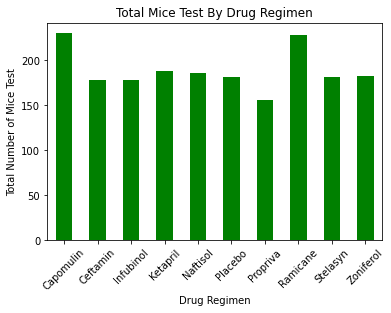

In [578]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint_drug_regimen = groupby_drug["Timepoint"].count()
timepoint_chart = timepoint_drug_regimen.plot.bar(rot=45, color="green", title="Total Mice Test By Drug Regimen")
timepoint_chart.set_ylabel("Total Number of Mice Test")
timepoint_chart

In [579]:
groupby_drug["Timepoint"].count()

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

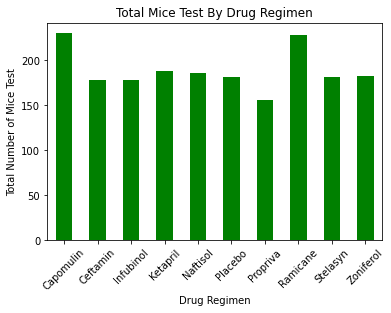

In [581]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoint_pyplot = groupby_drug["Timepoint"].count()
timepoint_pyplot.plot(kind='bar', color='green', title="Total Mice Test By Drug Regimen", rot=45)
plt.ylabel("Total Number of Mice Test")

plt.show()

In [582]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
female_male = clean_data.groupby(["Sex"]).count()
female_male

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,930,930,930,930,930,930,930
Male,958,958,958,958,958,958,958


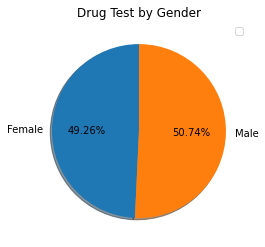

In [583]:
pie_chart = female_male.plot(kind='pie', y='Mouse ID', title="Drug Test by Gender", 
                             autopct = "%.2f%%", shadow = True,startangle=90)

pie_chart.set_ylabel("")
pie_chart.legend("")

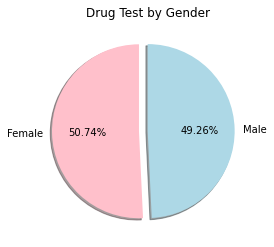

In [584]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_study = clean_data["Sex"].value_counts()

explode = (0.1,0)
colors =["pink", "lightblue"]
labels = (female_male.index)

plt.pie(sex_study, explode=explode, labels=labels, colors = colors, autopct = "%.2f%%", shadow = True, startangle=90)
plt.title("Drug Test by Gender")

plt.show()

## Quartiles, Outliers and Boxplots

In [585]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = clean_data.groupby(['Mouse ID'])['Timepoint'].max()
greatest_timepoint

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64

In [586]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
timepiont_df = pd.merge(greatest_timepoint, clean_data, on= (["Mouse ID", "Timepoint"]))
timepiont_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [587]:
# Put treatments into a list for for loop (and later for plot labels)
treatment =  ["Capomulin", "Ramicane", "Infubino", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

for treatment in treatments:
    tx_regimen = timepiont_df.loc[timepiont_df["Drug Regimen"] == treatment]
    tumor_vol= tx_regimen['Tumor Volume (mm3)']
    

    tumor_vol_data.append(tumor_vol)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartile0 = tumor_vol_data[0].quantile([.25,.5,.75])
lowerq0 = quartile0[0.25]
upperq0 = quartile0[0.75]
iqr0 = upperq0-lowerq0

lower_bound0 = lowerq0 - (1.5*iqr0)
upper_bound0 = upperq0 + (1.5*iqr0)
print(f"For {treatments[0]} values below {lower_bound0} and above {upper_bound0} could be outliers")


quartile1 = tumor_vol_data[1].quantile([.25,.5,.75])
lowerq1 = quartile1[0.25]
upperq1 = quartile1[0.75]
iqr1 = upperq1-lowerq1

lower_bound1 = lowerq1 - (1.5*iqr1)
upper_bound1 = upperq1 + (1.5*iqr1)
print(f"For {treatments[1]} values below {lower_bound1} and above {upper_bound1} could be outliers")


quartile2 = tumor_vol_data[2].quantile([.25,.5,.75])
lowerq2 = quartile2[0.25]
upperq2 = quartile2[0.75]
iqr2 = upperq2-lowerq2
      
lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)
print(f"For {treatments[2]} values below {lower_bound2} and above {upper_bound2} could be outliers")      
      

quartile3 = tumor_vol_data[3].quantile([.25,.5,.75])
lowerq3 = quartile3[0.25]
upperq3 = quartile3[0.75]
iqr3 = upperq3-lowerq3
    
lower_bound3 = lowerq3 - (1.5*iqr3)
upper_bound3 = upperq3 + (1.5*iqr3)
print(f"For {treatments[3]} values below {lower_bound3} and above {upper_bound3} could be outliers")


For Capomulin values below 20.70456164999999 and above 51.83201549 could be outliers
For Ramicane values below 17.912664470000003 and above 54.30681135 could be outliers
For Infubino values below nan and above nan could be outliers
For Ceftamin values below 25.355449580000002 and above 87.66645829999999 could be outliers


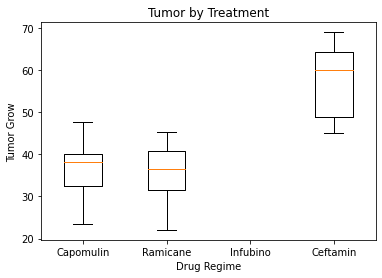

In [588]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_vol_data, flierprops = flierprops, labels = treatments)

ax1.set_title('Tumor by Treatment')
ax1.set_ylabel('Tumor Grow')
ax1.set_xlabel('Drug Regime')

plt.show()

## Line and Scatter Plots

In [589]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_treated = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]
cap_treated.value_counts("Mouse ID")

Mouse ID
b128    10
b742    10
x401    10
w914    10
v923    10
u364    10
t565    10
s710    10
s185    10
r944    10
r554    10
m957    10
m601    10
l897    10
l509    10
j119    10
i738    10
i557    10
g316    10
g288    10
y793    10
j246     8
f966     5
r157     4
w150     3
dtype: int64

In [594]:
Mouse_b128 = clean_data.loc[clean_data["Mouse ID"] == "b128"]
Mouse_b128

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0
305,b128,Capomulin,Female,9,22,25,43.262145,1
306,b128,Capomulin,Female,9,22,30,40.605335,1
307,b128,Capomulin,Female,9,22,35,37.967644,1
308,b128,Capomulin,Female,9,22,40,38.379726,2
309,b128,Capomulin,Female,9,22,45,38.982878,2


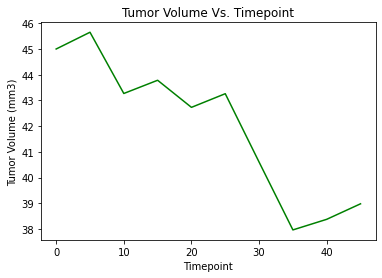

In [597]:
tumor_x = Mouse_b128["Timepoint"]
tumor_y = Mouse_b128["Tumor Volume (mm3)"]

plt.plot(tumor_x, tumor_y, color="green")

plt.title("Tumor Volume Vs. Timepoint")
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

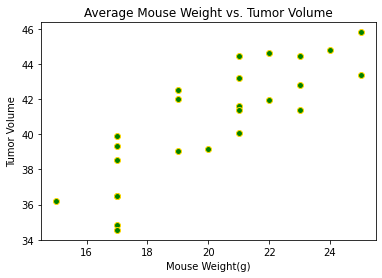

In [598]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_cap_treated = cap_treated.groupby(["Mouse ID"]).mean()

tumor_x = avg_cap_treated["Weight (g)"]
tumor_y = avg_cap_treated["Tumor Volume (mm3)"]

plt.scatter(tumor_x, tumor_y, marker="o", facecolors="green", edgecolors="gold")
plt.title("Average Mouse Weight vs. Tumor Volume")
plt.xlabel("Mouse Weight(g)")
plt.ylabel("Tumor Volume")

plt.show()

## Correlation and Regression

Text(0, 0.5, 'Tumor Volume')

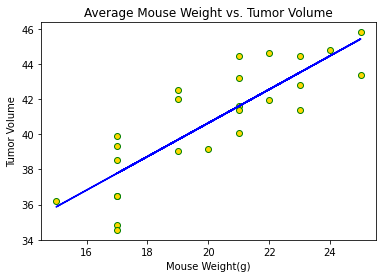

In [599]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
tumor_x = avg_cap_treated["Weight (g)"]
tumor_y = avg_cap_treated["Tumor Volume (mm3)"]

correlation = st.pearsonr(tumor_x,tumor_y)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress (tumor_x, tumor_y)
regress_values = tumor_x * slope + intercept

plt.scatter(tumor_x, tumor_y, facecolors="gold", edgecolors="green")
plt.plot(tumor_x,regress_values,"b-")

plt.title("Average Mouse Weight vs. Tumor Volume")
plt.xlabel("Mouse Weight(g)")
plt.ylabel("Tumor Volume")
